# Feature Selection - Filter Method

In [3]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
X = df.drop(['PassengerId', 'Survived', 'Name'], axis = 1)

In [6]:
y = df['Survived']

In [9]:
continious_features = ['Age', 'Fare']
descrete_features = ['Pclass','Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'],

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

### Checking the importance of age

In [23]:
df[df['Survived'] == 1].shape

(342, 12)

In [24]:
df.shape

(891, 12)

In [25]:
891 - 342

549

#### Label is descrete binary and age is continious Random Variable with survived and not survived people more than 30

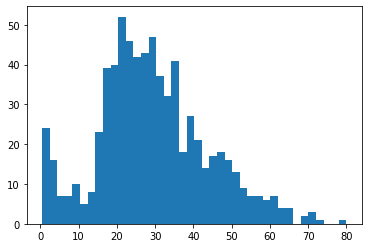

In [27]:
plt.hist(X['Age'], bins = 40)
plt.show()

In [31]:
stat, p_val = stats.shapiro(X['Age'].values)
print(stat, p_val)

nan 1.0


In [32]:
survived = df[df['Survived'] == 1]
died = df[df['Survived'] == 0]

In [39]:
survived[survived['Age'].isna() == True].shape

(52, 12)

In [46]:
survived['Age'] = survived['Age'].fillna(value = survived['Age'].mean())
died['Age'] = died['Age'].fillna(value = died['Age'].mean())

<ipython-input-46-5a0828af7e26>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survived['Age'] = survived['Age'].fillna(value = survived['Age'].mean())
<ipython-input-46-5a0828af7e26>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  died['Age'] = died['Age'].fillna(value = died['Age'].mean())


In [47]:
survived[survived['Age'].isna() == True].shape

(0, 12)

In [48]:
died[died['Age'].isna() == True].shape

(0, 12)

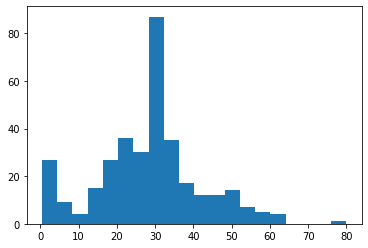

In [57]:
plt.hist(survived['Age'], bins = 20)
plt.show()

In [51]:
stat, p_val = stats.shapiro(survived['Age'].values)
print(stat, p_val)

0.9696892499923706 1.4281470157584408e-06


In [85]:
stat > 0.05

True

In [53]:
stat, p_val = stats.shapiro(died['Age'].values)
print(stat, p_val)

0.9451428651809692 2.2315404190308141e-13


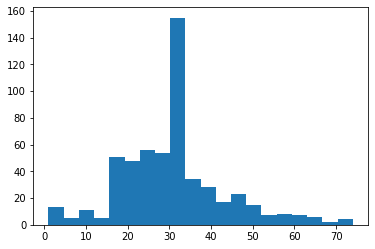

In [58]:
plt.hist(died['Age'], bins = 20)
plt.show()

### Apply T Test

In [60]:
t_stat, p_val = stats.ttest_ind(survived['Age'].values, died['Age'].values)
print(t_stat, p_val)

-2.5545424967976222 0.010798379035665778


In [61]:
p_val < 0.05

True

In [62]:
survived['Age'].mean()

28.343689655172412

In [63]:
died['Age'].mean()

30.626179245283016

In [65]:
died['Age'].std()

12.451291919190274

### Z Test

In [68]:
survived_mean = survived['Age'].mean()
died_mean = died['Age'].mean()

survived_std = survived['Age'].std()
died_std = died['Age'].std()

In [69]:
survived_mean

28.343689655172412

In [70]:
died_mean

30.626179245283016

In [71]:
survived_std

13.763870524828732

In [72]:
died_std

12.451291919190274

In [79]:
pooled_std = np.sqrt(
    (survived_std ** 2 / len(survived)) + (died_std ** 2 / len(died))
)
z_stat = (survived_mean - died_mean) / pooled_std

In [80]:
z_stat

-2.495866193947317

In [82]:
p_val = (1 - stats.norm.cdf(abs(z_stat))) * 2
p_val

0.012564998835656205

In [83]:
p_val <0.05

True

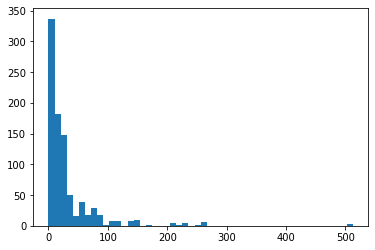

In [95]:
plt.hist(df['Fare'], bins = 50)
plt.show()

In [87]:
stat, p_val = stats.shapiro(df['Fare'].values)

print(stat, p_val)

0.5218914747238159 1.0789998175301091e-43


In [96]:
t_stat, p_val = stats.ttest_ind(survived['Fare'].values, died['Fare'].values)
print(t_stat, p_val)

7.939191660871055 6.120189341924198e-15


In [100]:
contingency_table = pd.crosstab(df['Sex'], df['Survived'])
contingency_table

Survived,0,1
Sex,,
female,81,233
male,468,109


In [101]:
chi_stat, p_val, dof, exp = stats.chi2_contingency(contingency_table)

In [102]:
exp

array([[193.47474747, 120.52525253],
       [355.52525253, 221.47474747]])

In [106]:
p_val

1.1973570627755645e-58

In [107]:
chi_stat

260.71702016732104

In [111]:
df[df['Pclass'].isnull() == True].count()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [112]:
contingency_table = pd.crosstab(df['Pclass'], df['Survived'])

In [113]:
contingency_table

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [114]:
chi_stat, p_val, dof, exp = stats.chi2_contingency(contingency_table)

In [115]:
exp

array([[133.09090909,  82.90909091],
       [113.37373737,  70.62626263],
       [302.53535354, 188.46464646]])

In [116]:
print(chi_stat, p_val, dof)

102.88898875696056 4.549251711298793e-23 2


In [136]:
embarked = df[df['Embarked'].isna() != True]

In [137]:
con_tab = pd.crosstab(embarked['Embarked'], embarked['Survived'])
con_tab

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


In [138]:
chi_stat, p_val, dof, exp = stats.chi2_contingency(con_tab)

In [139]:
exp

array([[103.7480315,  64.2519685],
       [ 47.5511811,  29.4488189],
       [397.7007874, 246.2992126]])

In [140]:
print(chi_stat, p_val, dof)

26.48914983923762 1.769922284120912e-06 2


In [158]:
df['Cabin'] = df['Cabin'].fillna(value = 'Z')

In [160]:
df['Cabin'] = df['Cabin'].str[0]
df['Cabin'].unique()

array(['Z', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [162]:
con_tab = pd.crosstab(df['Survived'], df['Cabin'])
con_tab

Cabin,A,B,C,D,E,F,G,T,Z
Survived,,,,,,,,,
0,8,12,24,8,8,5,2,1,481
1,7,35,35,25,24,8,2,0,206


In [163]:
chi_stat, p_val, dof, exp = stats.chi2_contingency(con_tab)

In [164]:
print(chi_stat, p_val, dof)

99.16416061888009 6.326020042314704e-18 8


In [166]:
exp < 5

array([[False, False, False, False, False, False,  True,  True, False],
       [False, False, False, False, False,  True,  True,  True, False]])

array(['Z', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [211]:
df2 = df[~df['Cabin'].isin(["G", "T", "F"])]

In [212]:
con_tab = pd.crosstab(df2['Pclass'], df2['Cabin'])
con_tab

Cabin,A,B,C,D,E,Z
Pclass,,,,,,
1,15,47,59,29,25,40
2,0,0,0,4,4,168
3,0,0,0,0,3,479


In [207]:
chi_stat, p_val, dof, exp = stats.chi2_contingency(con_tab)

In [208]:
exp < 5

array([[ True, False, False, False, False, False],
       [ True, False, False, False, False, False],
       [False, False, False, False, False, False]])

In [209]:
print(chi_stat, p_val, dof)

624.6316926246767 9.26181692616259e-128 10
